 # Classification - Health Insurance Cross Sell Prediction



# **Project Summary -**

an insurance company, currently provides health insurance to its customers. They now seek assistance in building a model to predict whether policyholders from the past year will also be interested in the company's vehicle insurance.

An insurance policy is an arrangement in which a company guarantees compensation for specified loss, damage, illness, or death in return for the payment of a premium. A premium is the sum of money that customers regularly pay to the insurance company for this guarantee. For example, a customer might pay a premium of Rs. 5000 annually for a health insurance cover of Rs. 200,000. If the customer needs hospitalization within that year, the insurance provider will cover the hospital costs up to Rs. 200,000.

You might wonder how the company can afford such high hospitalization costs while charging a premium of only Rs. 5000. This is where probabilities play a crucial role. Out of 100 customers paying Rs. 5000 each per year, only a few (say 2-3) might need hospitalization. This way, everyone shares the risk with each other.

Similarly, in vehicle insurance, customers pay an annual premium to the insurance company. In the event of an unfortunate vehicle accident, the insurance provider compensates the customer with a sum assured.

Building a model to predict whether a customer would be interested in vehicle insurance is extremely beneficial for the company. It allows the company to plan its communication strategy to reach those customers effectively, optimizing its business model and revenue.

To predict a customer's interest in vehicle insurance, we have information on demographics (gender, age, region code type), vehicles (vehicle age, damage), and policy details (premium, sourcing channel), among others.

# **Problem Statement**


**An insurance company, seeks to build a model to predict whether their health insurance policyholders from the past year will also be interested in vehicle insurance. This prediction will help the company optimize its communication strategies and improve its business model and revenue. The model will utilize information on customer demographics, vehicle details, and policy specifics..**

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
df = pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [ ]:
df.sample(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
112014,112015,Female,22,1,45.0,0,< 1 Year,Yes,25620.0,152.0,233,0
236983,236984,Male,42,1,28.0,0,1-2 Year,Yes,26151.0,124.0,133,0
369537,369538,Male,43,1,28.0,0,1-2 Year,Yes,39894.0,26.0,155,0
8345,8346,Female,22,1,30.0,1,< 1 Year,No,26307.0,152.0,108,0
281675,281676,Male,54,1,28.0,0,1-2 Year,Yes,38071.0,26.0,142,0
39232,39233,Male,56,1,28.0,0,1-2 Year,Yes,28169.0,124.0,108,1
123149,123150,Male,67,1,18.0,1,1-2 Year,No,31087.0,26.0,226,0
170785,170786,Male,25,1,50.0,1,< 1 Year,No,44649.0,152.0,96,0
354486,354487,Male,63,1,28.0,1,1-2 Year,No,31691.0,26.0,198,0
23766,23767,Male,24,1,8.0,0,< 1 Year,Yes,48994.0,152.0,136,0


### Dataset Rows & Columns count

In [ ]:
df.shape

(381109, 12)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# sum of duplicated rows
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
#sum of Missing Values
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


<Figure size 1000x600 with 0 Axes>

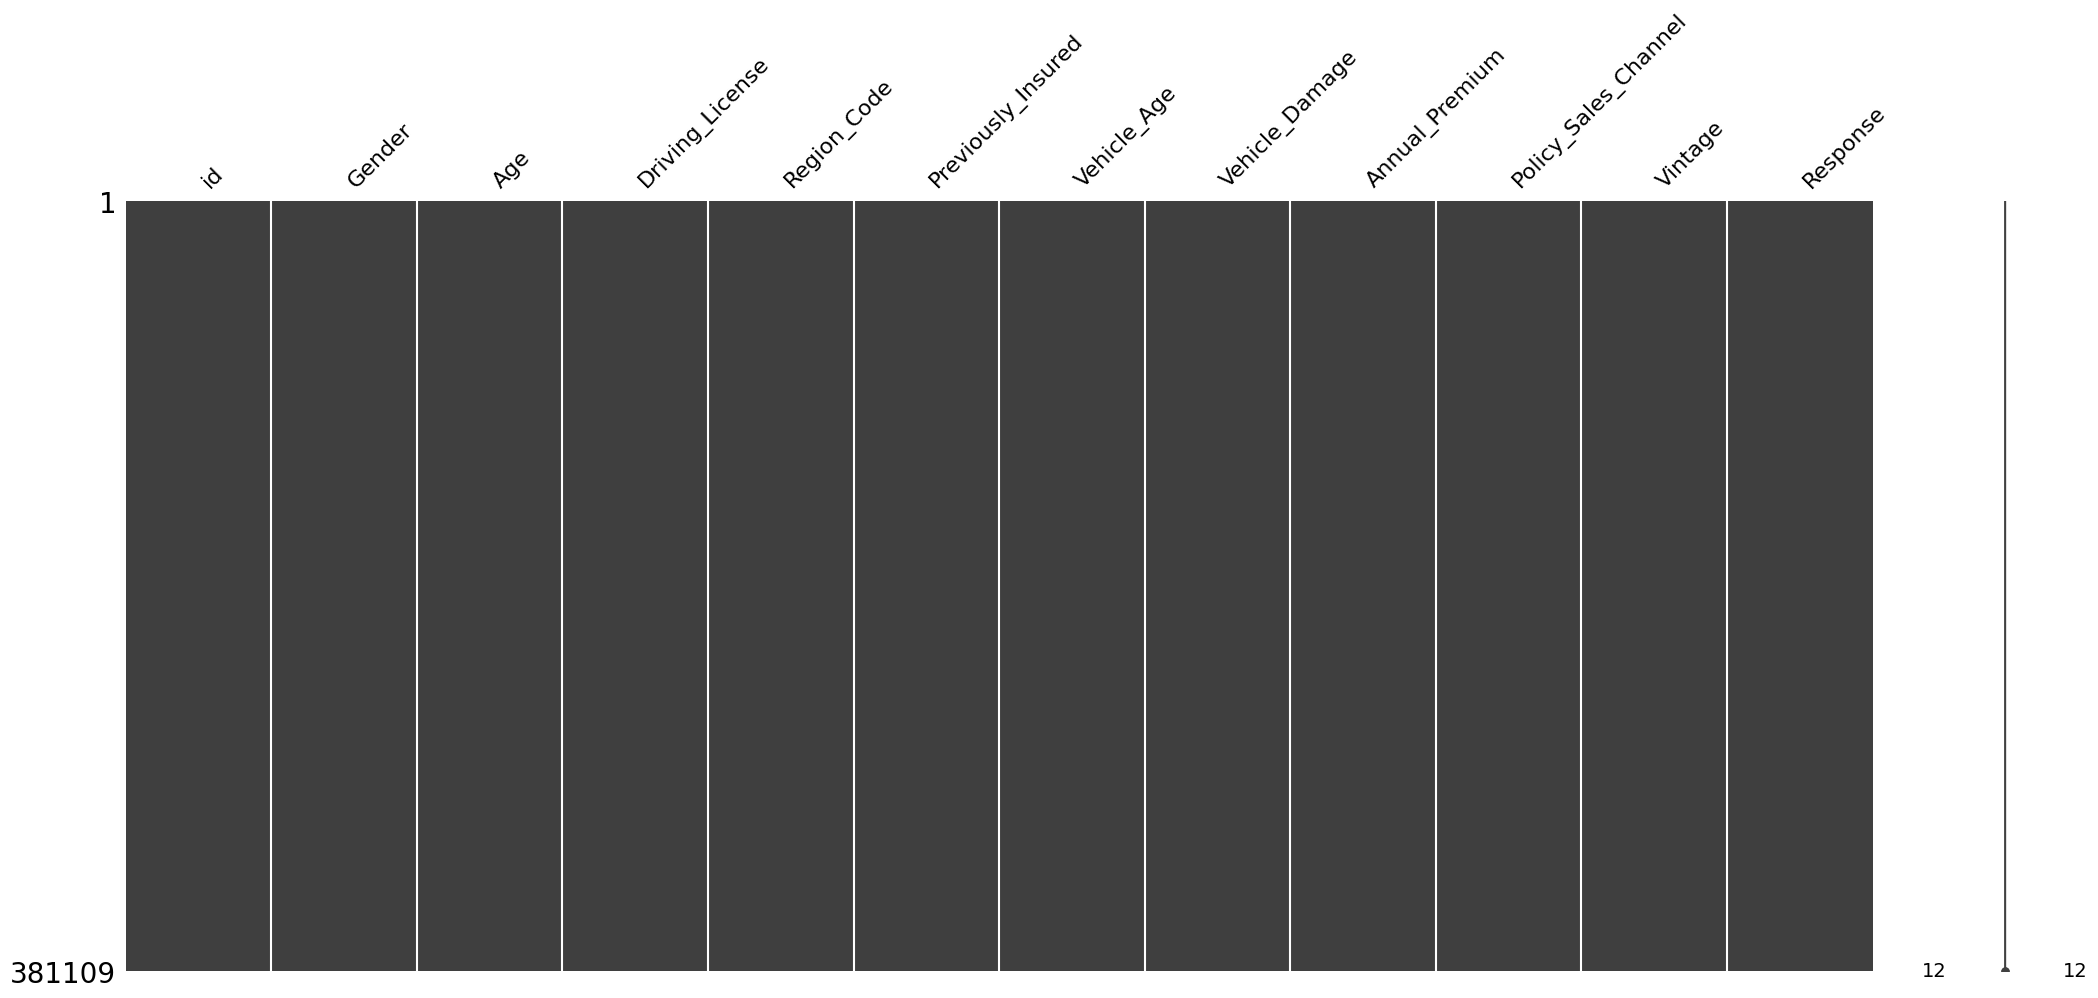

In [ ]:
# Visualizing the missing values

# Matrix plot
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.show()

### What did you know about your dataset?

- This dataset is quite clean, containing no duplicate entries or missing values. It consists of 381,109 rows and 12 features.




## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description


Data Feilds

- id: Unique ID for customer
- Gender: Male/Female
- Age: Age of customer
- Driving_License: Customer has DL or not
- Region_Code: Unique code for the region of the customer
- Previously_insured: Customer already has vehicle insurance or not
- Vehicle_age: Age of the vehicle
- Vehicle_damage: Past damages present or not
- Annual_premium: The amount customer needs to pay as premium
- PolicySalesChannel: Anonymized Code for the channel of outreaching to the customer i.e. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage: Number of Days, Customer has been associated with the company
- Response: Customer is interested or not


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for Categorical variable.
print("Unique values of Vehicle Age: ",df['Vehicle_Age'].unique())
print("\nUnique values of Vehicle Damage: ",df['Vehicle_Damage'].unique())
print("\nUnique values of Gender: ",df['Gender'].unique())

Unique values of Vehicle Age:  ['> 2 Years' '1-2 Year' '< 1 Year']

Unique values of Vehicle Damage:  ['Yes' 'No']

Unique values of Gender:  ['Male' 'Female']


## 3. ***Data Wrangling***

### What all manipulations have you done and insights

*   The dataset was cleaned, and I didn't feel the need for data manipulation for data visualization.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

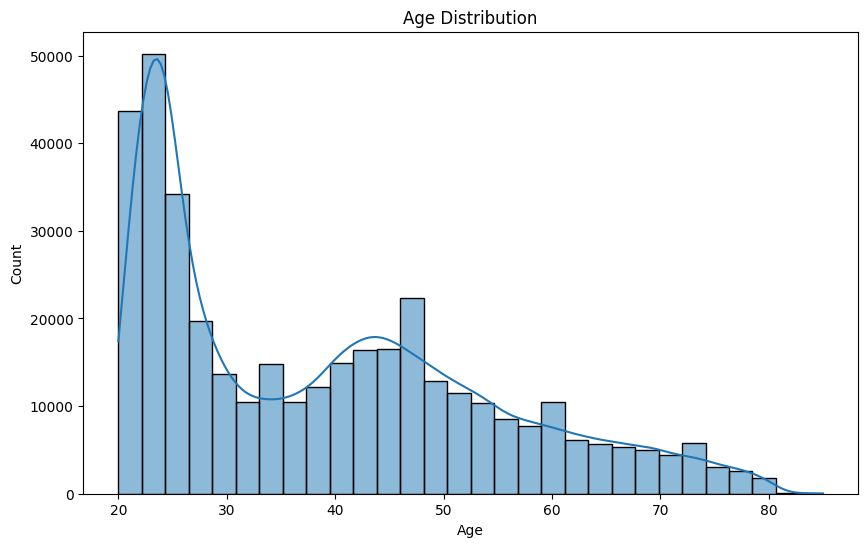

In [ ]:
# Chart - 1 visualization code

# histogram of age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

This plot shows the distributation of the age category this make easier to run marketing campains targetting a specific age group and improving the services to attract other age group people

##### 2. What is/are the insight(s) found from the chart?

From the observatation we can clearly observe that the dataset has a large set of people ranging from 20 to 30 Y/O peoples

##### 3. Will the gained insights help creating a positive business impact?

As we can see this dataset has so lees number of customers of age between 40 to 80 years of range they sould focus on that age category as well

#### Chart - 2

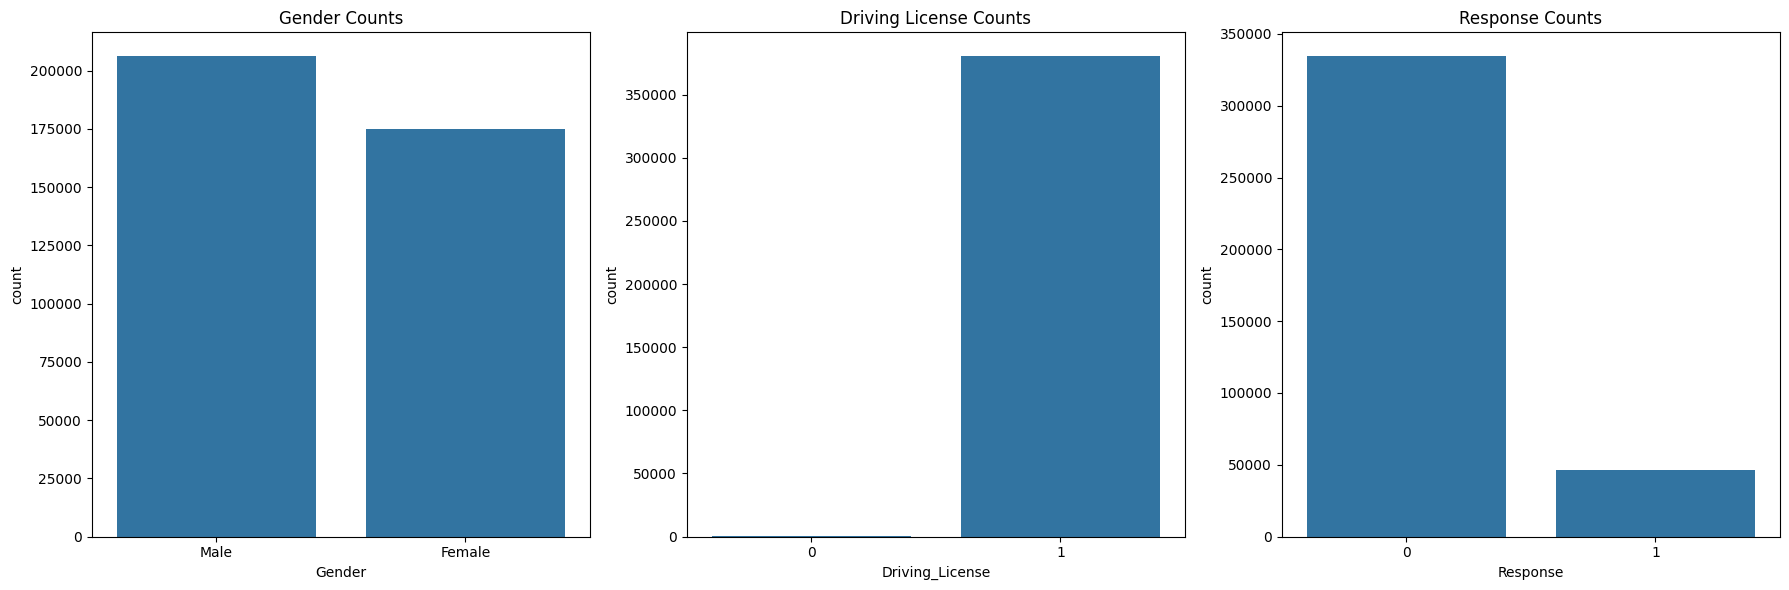

In [ ]:
# Chart - 2 visualization code

# Bar plots for gender, driving_license, response
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.countplot(x='Gender', data=df)
plt.title('Gender Counts')

plt.subplot(1,3,2)
sns.countplot(x='Driving_License', data=df)
plt.title('Driving License Counts')

plt.subplot(1,3,3)
sns.countplot(x='Response', data=df)
plt.title('Response Counts')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This shows the distributation of the counts in categorical featres

##### 2. What is/are the insight(s) found from the chart?

The visualization reveals a balanced gender distribution among customers. Additionally, a vast majority of them possess driving licenses. However, the proportion of customers expressing interest in vehicle insurance remains notably small.

##### 3. Will the gained insights help creating a positive business impact?


- Targeted Marketing: Knowing that the gender distribution is balanced means marketing campaigns can be designed to appeal to both men and women equally. This avoids alienating any specific demographic and maximizes reach.
- Focused Product Development: Since most customers already have driving licenses, the company can focus on developing vehicle insurance products that cater to this specific audience. This could involve offering specialized coverage options or competitive pricing.
- Improved Conversion Strategies: The low interest in vehicle insurance indicates a need to refine communication strategies. This could involve highlighting the benefits of vehicle insurance more effectively, addressing customer concerns, or offering incentives.

#### Chart - 3

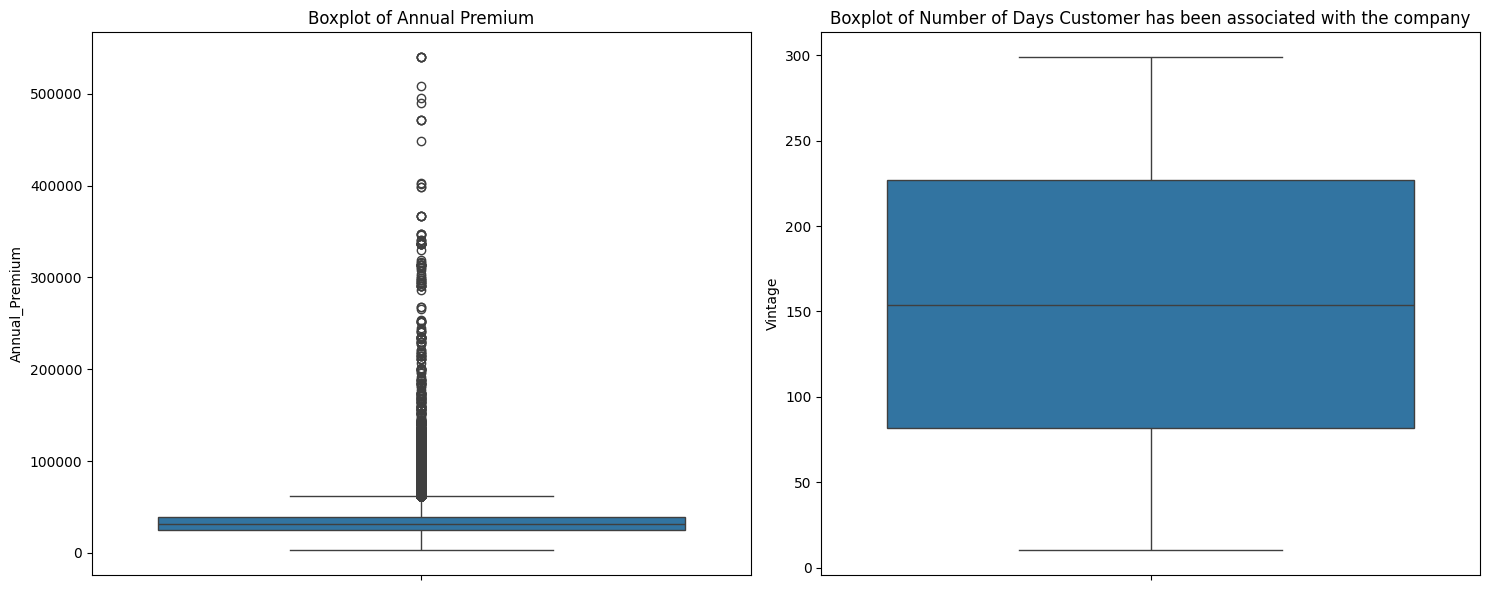

In [ ]:
# Chart - 3 visualization code

# Box plot for numerical variables
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(y='Annual_Premium', data=df)
plt.title('Boxplot of Annual Premium')

plt.subplot(1,2,2)
sns.boxplot(y='Vintage', data=df)
plt.title('Boxplot of Number of Days Customer has been associated with the company')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This shoes the distributation of the numericals features in the dataset

##### 2. What is/are the insight(s) found from the chart?

The "Annual Premium" column shows a significant presence of outliers, indicating a wide range in premium costs. Additionally, the average customer association with the company spans approximately 150 days.

##### 3. Will the gained insights help creating a positive business impact?

Yes. Understanding premium outliers and average customer association enables tailored pricing, risk management, and targeted retention strategies, ultimately improving business outcomes.

#### Chart - 4

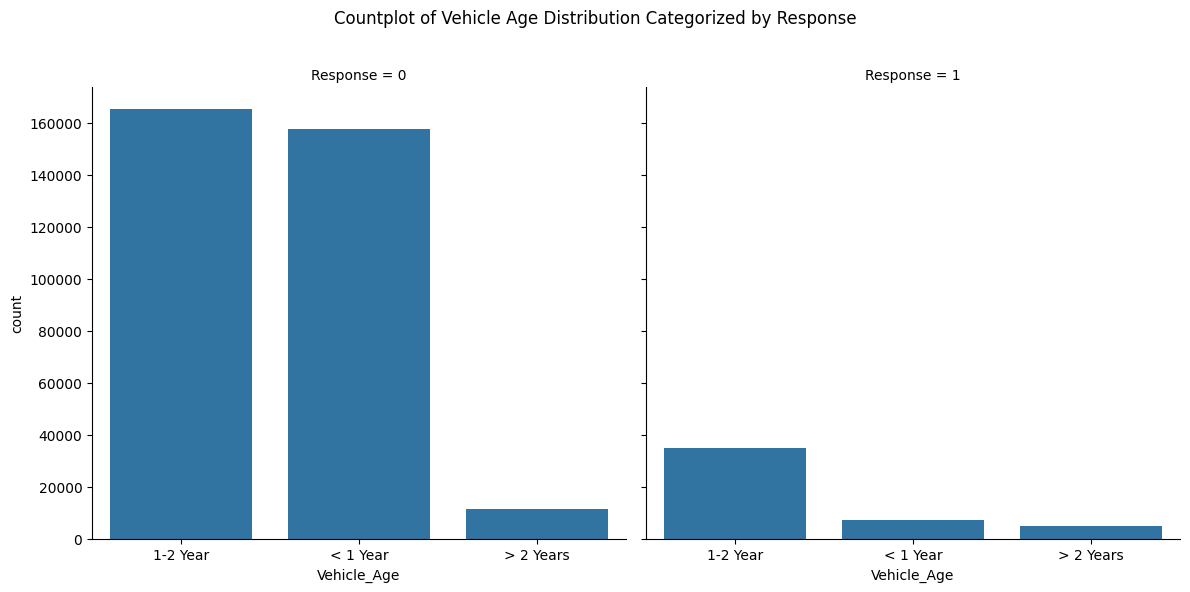

In [ ]:
# Chart - 4 visualization code

# Plotting Vehicle_Age vs Response
g = sns.FacetGrid(df, col="Response", height=6)

g.map(sns.countplot, 'Vehicle_Age', order=df['Vehicle_Age'].value_counts().index)

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Countplot of Vehicle Age Distribution Categorized by Response')

plt.show()

##### 1. Why did you pick the specific chart?

This plot Shows the distribution of customer interest in vehicle insurance across different vehicle ages.

##### 2. What is/are the insight(s) found from the chart?

The data indicates a higher proportion of customers with vehicles older than two years express interest in vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, targeting customers with older vehicles through tailored marketing and products can increase insurance uptake and improve business outcomes.

#### Chart - 5

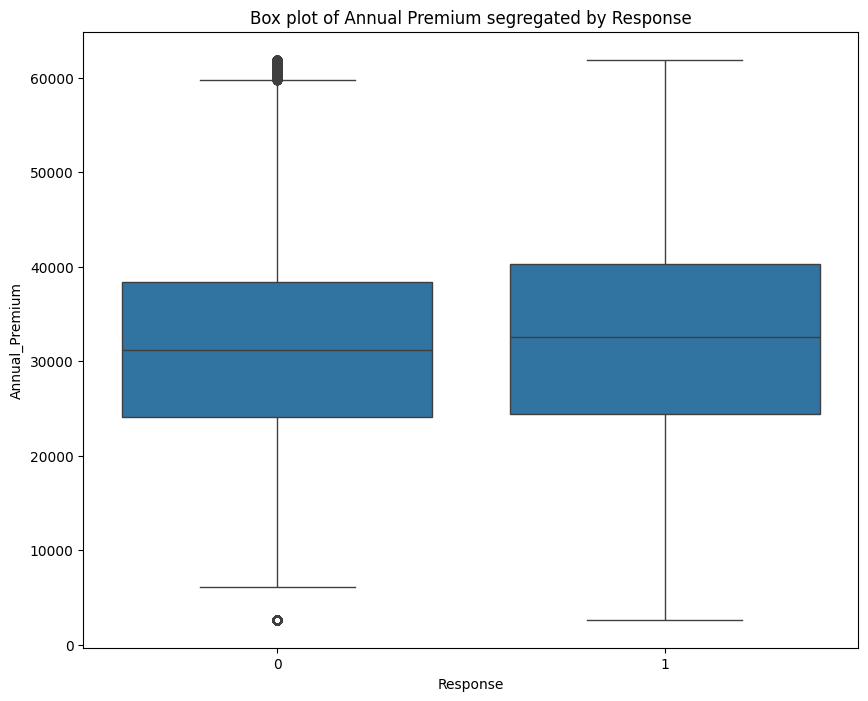

In [ ]:
# Chart - 5 visualization code

# Filter out outliers
q1 = df['Annual_Premium'].quantile(0.25)
q3 = df['Annual_Premium'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_df = df[(df['Annual_Premium'] >= lower_bound) & (df['Annual_Premium'] <= upper_bound)]

# Box plot of 'Annual_Premium' grouped by 'Response'
plt.figure(figsize=(10,8))
sns.boxplot(x='Response', y='Annual_Premium', data=filtered_df)
plt.title('Box plot of Annual Premium segregated by Response')
plt.show()

#### Chart - 6 - Correlation Heatmap

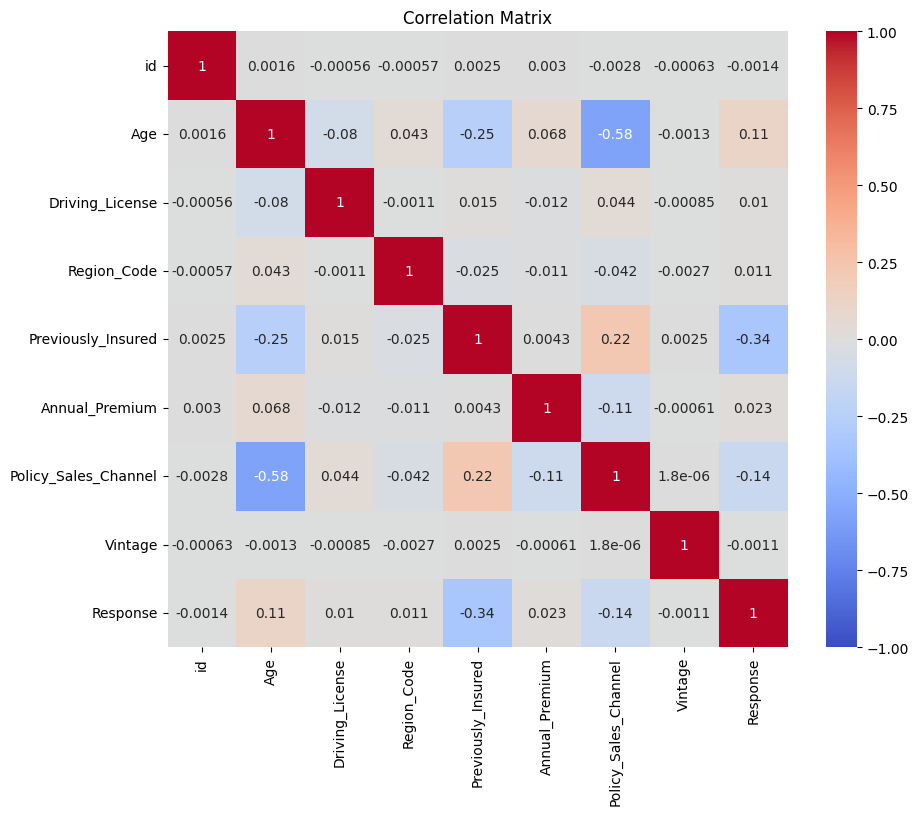

In [ ]:
# Calculate the correlation matrix
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#### Chart - 7 - Pair Plot

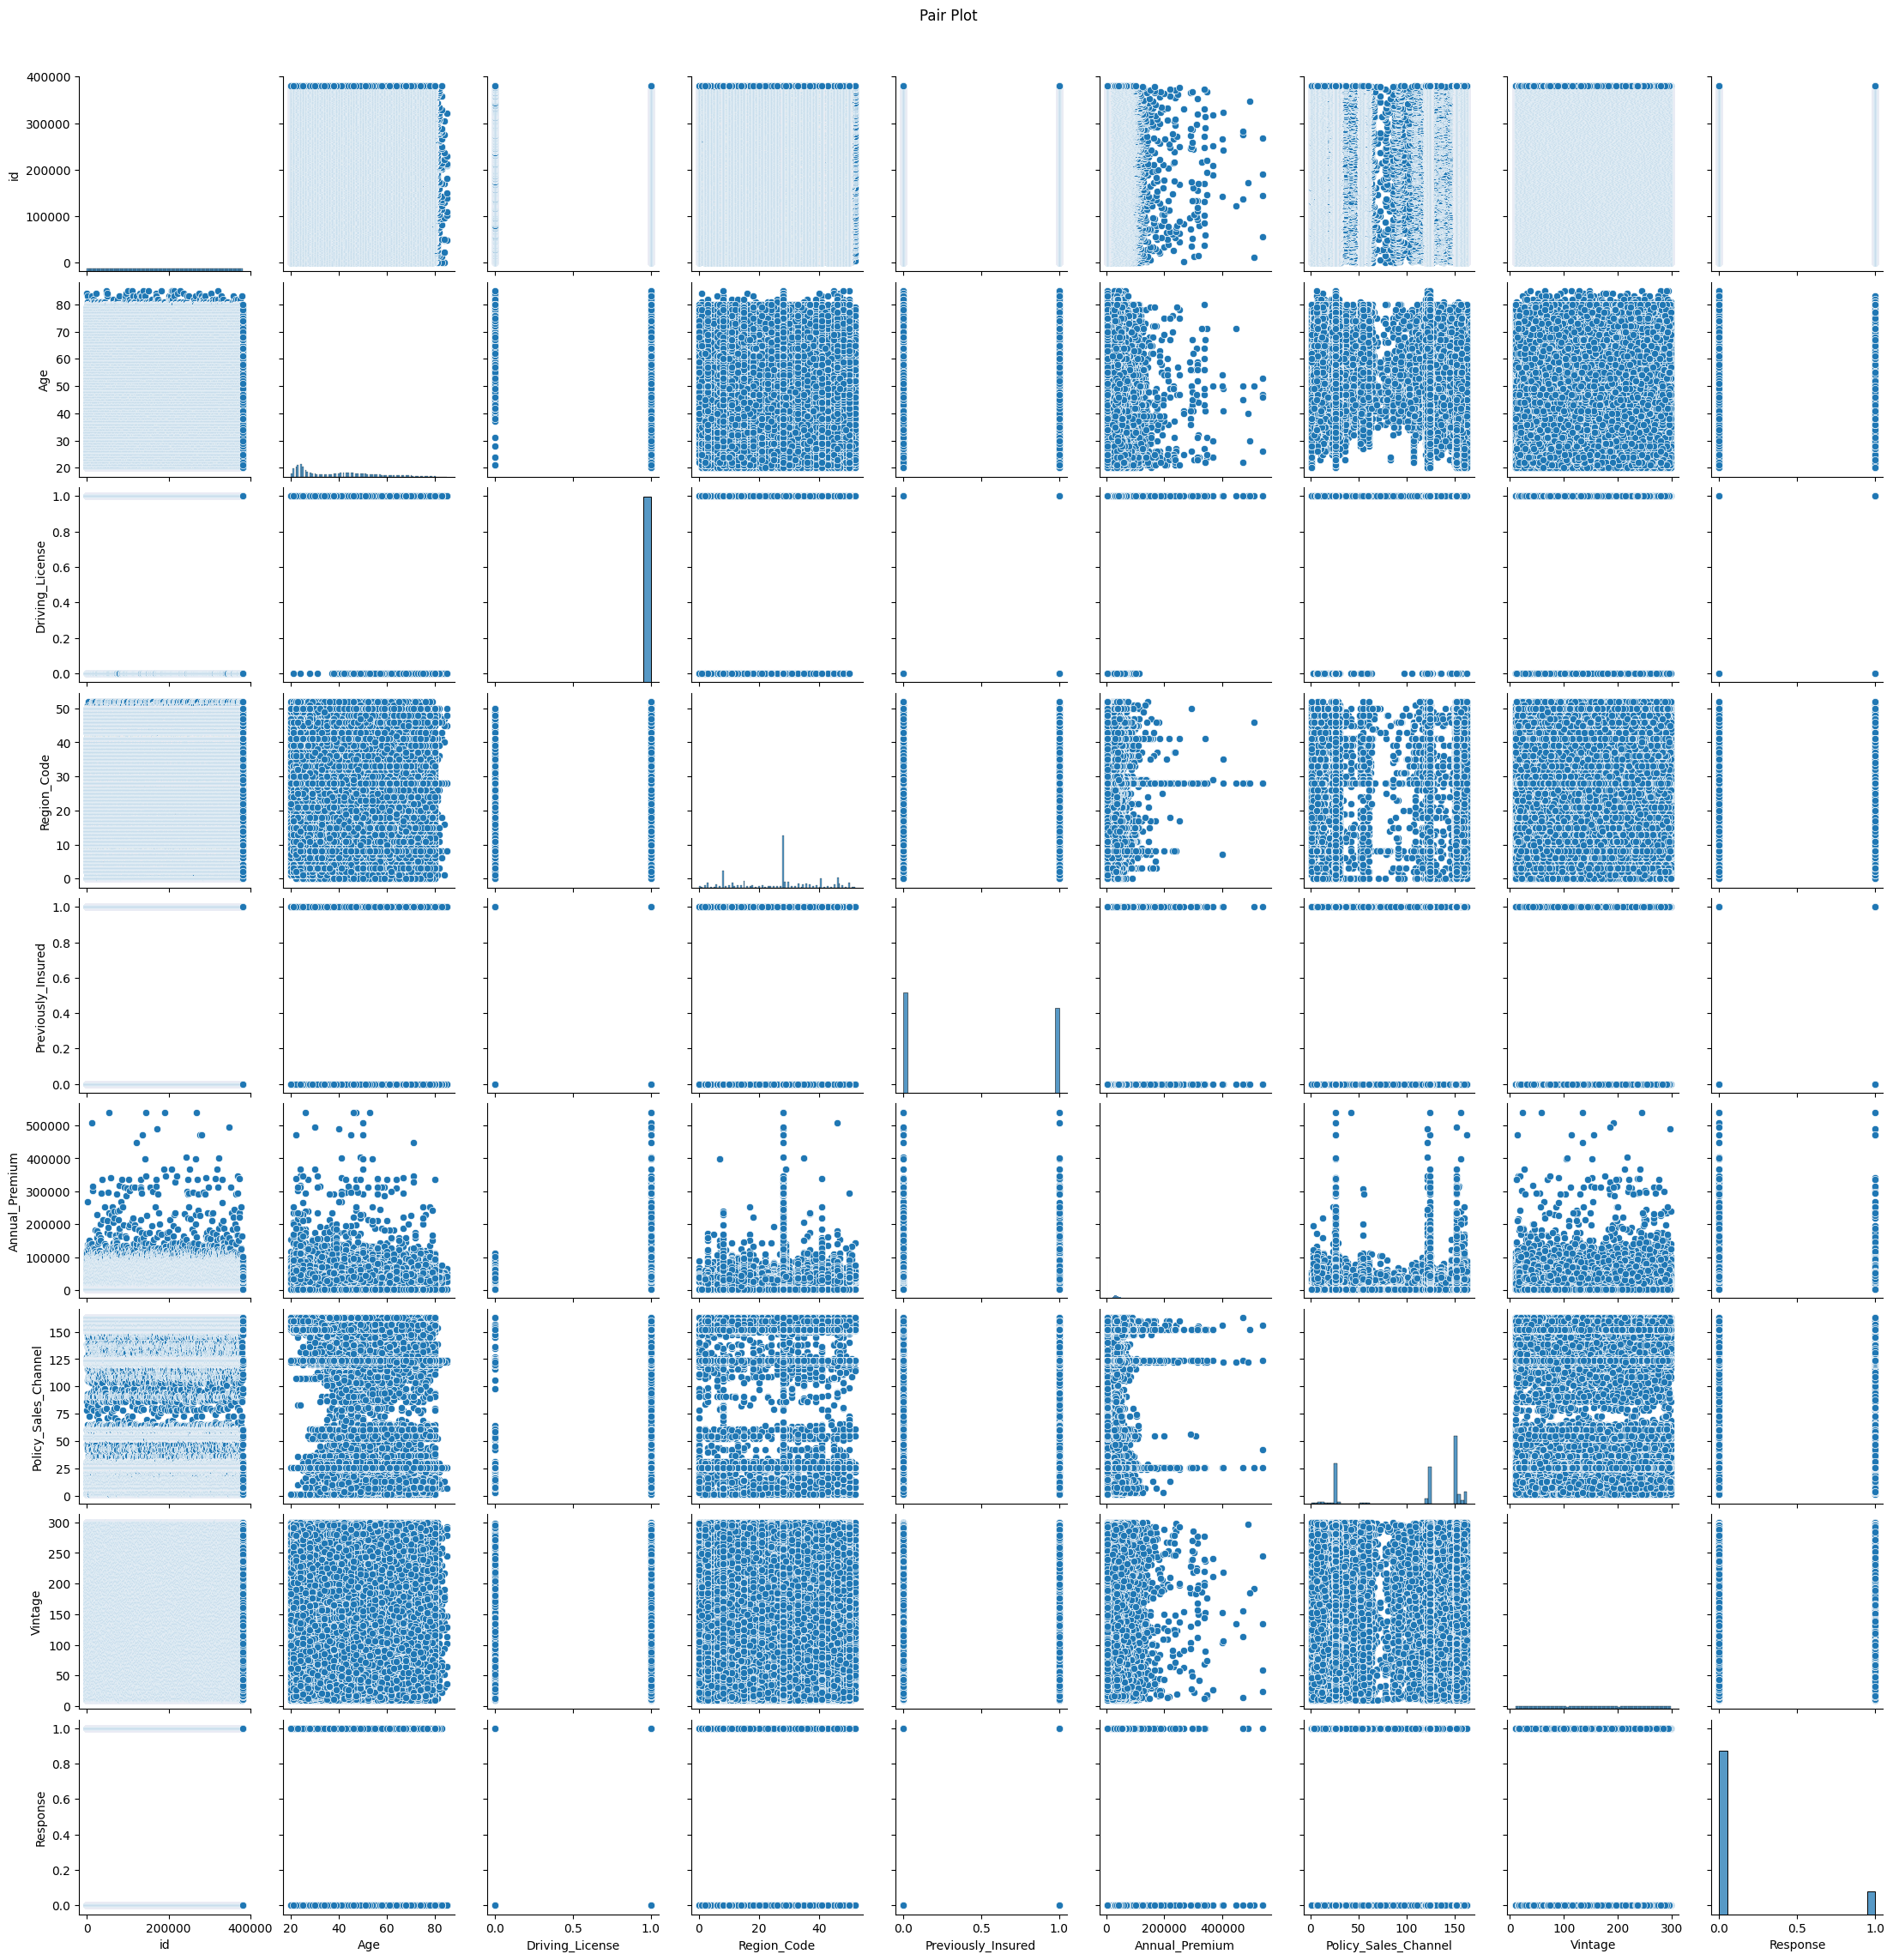

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.suptitle('Pair Plot', y=1.02)
plt.show()

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

In [ ]:
# calculate the IQR for the 'Annual_Premium' column
IQR = df['Annual_Premium'].quantile(0.75) - df['Annual_Premium'].quantile(0.25)

lower_bound = df['Annual_Premium'].quantile(0.25) - (IQR * 1.5)
upper_bound = df['Annual_Premium'].quantile(0.75) + (IQR * 1.5)

# adjust outliers within the upper and lower bounds
df['Annual_Premium'] = np.where(df['Annual_Premium'] < lower_bound, lower_bound, df['Annual_Premium'])
df['Annual_Premium'] = np.where(df['Annual_Premium'] > upper_bound, upper_bound, df['Annual_Premium'])

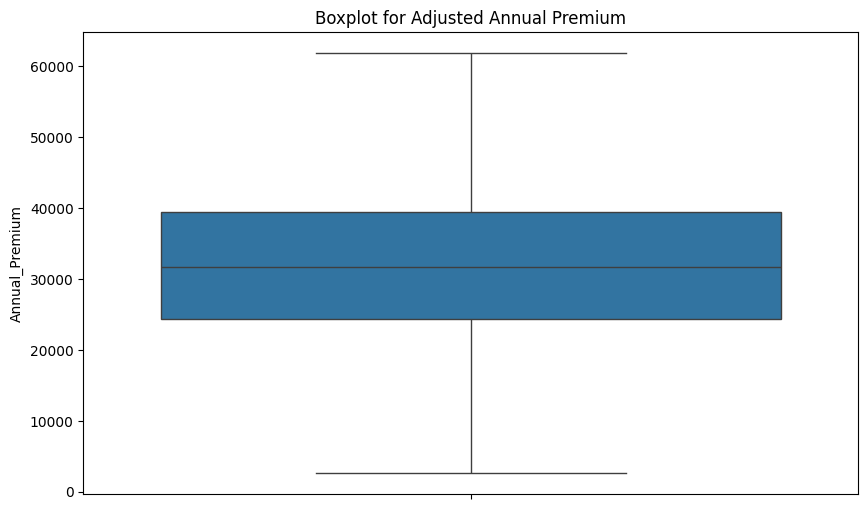

In [ ]:
# Post-adjustment boxplot for Annual_Premium
plt.figure(figsize=(10,6))
sns.boxplot(y=df['Annual_Premium'])
plt.title('Boxplot for Adjusted Annual Premium')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 2. Categorical Encoding

In [ ]:
# Encoding Vehicle_Age, Vehicle_Damage, and Gender
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year':1, '1-2 Year':2, '> 2 Years':3})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1, 'No':0})
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [ ]:
print("Unique values of Vehicle Age are: ",df['Vehicle_Age'].unique())
print("\nUnique values of Vehicle Damage are: ",df['Vehicle_Damage'].unique())
print("\nUnique values of Gender are: ",df['Gender'].unique())

Unique values of Vehicle Age are:  [3 2 1]

Unique values of Vehicle Damage are:  [1 0]

Unique values of Gender are:  [1 0]


#### What all categorical encoding techniques have you used & why did you use those techniques?

I am Using manual label encoding.


- Vehicle_Age: The vehicle ages have a natural order (older vehicles are assigned higher numbers). Label encoding preserves this order.
- Vehicle_Damage and Gender: These are binary features. Mapping them to 0 and 1 makes them suitable for machine learning algorithms.

### 3. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
X = df.drop(['Response', 'id'], axis=1)
y = df['Response']

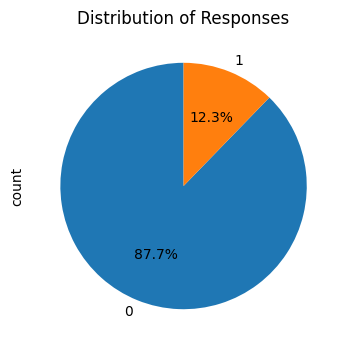

In [ ]:
df['Response'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90
)

plt.gcf().set_size_inches(4, 4)
plt.title('Distribution of Responses')
plt.show()

As we can clearly see our target variable is so unbalanced as "0" people not interested has 87.7% of the records where as the "1" people interested has only 12.3% of records



In [ ]:
# Handling Imbalanced Dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)


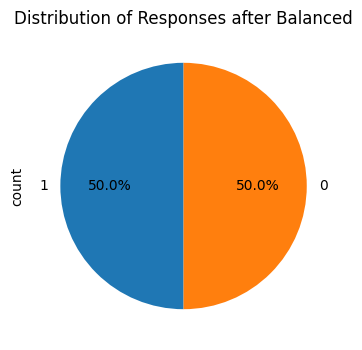

In [ ]:
y.value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90
)

plt.gcf().set_size_inches(4, 4)
plt.title('Distribution of Responses after Balanced')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We are oversampling the Dataset using SMOTE

### 4. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

##### What data splitting ratio have you used and why?




80-20:

As we have a lot of data and we want to maximize the amount of data used for training.


## ***6. ML Model Implementation***

In [ ]:
# importing libraries

import joblib
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve
)


### ML Model - 1 LogisticRegression

In [ ]:
logreg = LogisticRegression(max_iter=100)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62     66880
           1       0.61      0.55      0.58     66880

    accuracy                           0.60    133760
   macro avg       0.60      0.60      0.60    133760
weighted avg       0.60      0.60      0.60    133760



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62     66880
           1       0.61      0.55      0.58     66880

    accuracy                           0.60    133760
   macro avg       0.60      0.60      0.60    133760
weighted avg       0.60      0.60      0.60    133760



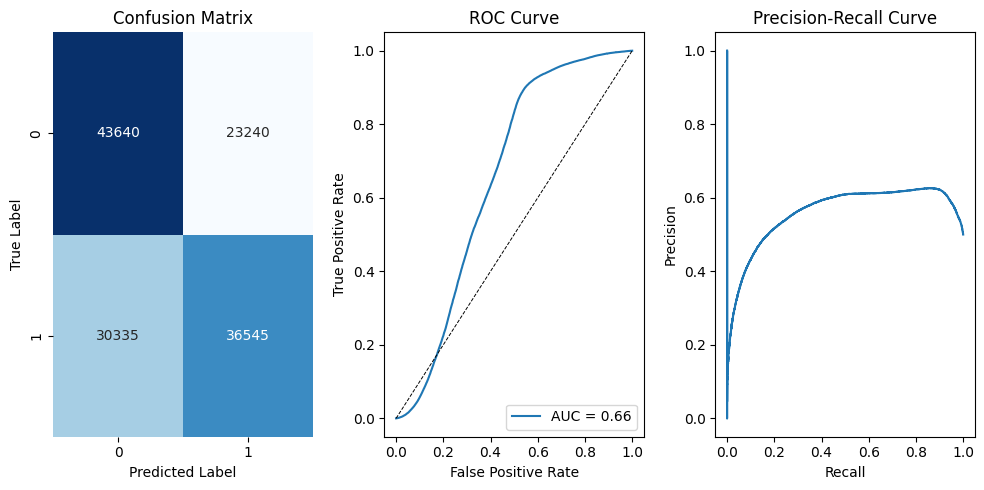

In [ ]:
# Classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=0.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.subplot(1, 3, 3)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
param_distributions = {
    'C': np.logspace(-4, 4, 10),
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# Randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_distributions,
    n_iter=5,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(random_search.best_params_)

# Print the best cross-validation score
print("Best Cross-Validation Score: {:.2f}".format(random_search.best_score_))

# Evaluate on the test set
best_model = random_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Set Score: {:.2f}".format(test_score))

# Save the best model
joblib.dump(best_model, 'best_logreg_model.pkl')
print("Best model saved as 'best_logreg_model.pkl'")

Best Hyperparameters:
{'solver': 'liblinear', 'penalty': 'l2', 'C': 21.54434690031882}
Best Cross-Validation Score: 0.78
Test Set Score: 0.78
Best model saved as 'best_logreg_model.pkl'


##### Which hyperparameter optimization technique have you used and why?

I used RandomizedSearchCV instead of GridSearchCV because the latter required too much computation and time to test all the hyperparameter combinations.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyperparameter tuning, the model's accuracy improved by a significant 20%.

### ML Model - 2 Decision Tree Classifier

In [ ]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Fit the model
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
y_pred_proba = decision_tree.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred))


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     66880
           1       0.88      0.89      0.88     66880

    accuracy                           0.88    133760
   macro avg       0.88      0.88      0.88    133760
weighted avg       0.88      0.88      0.88    133760



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

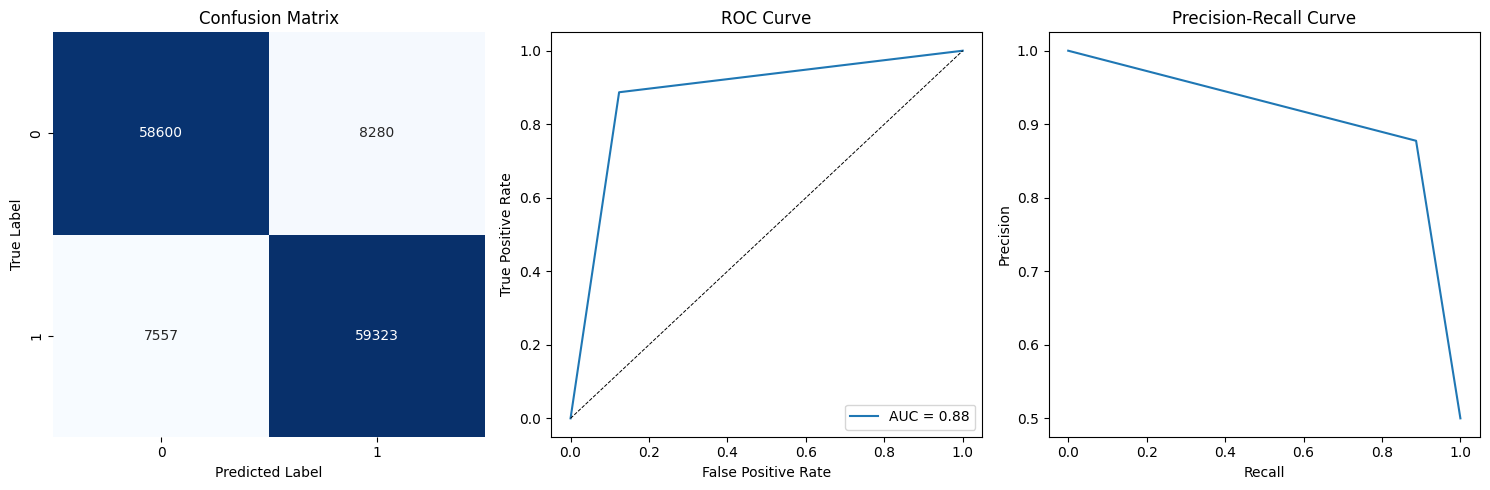

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=0.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.subplot(1, 3, 3)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# parameter distribution
param_distributions = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=decision_tree,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit to randomized search
random_search.fit(X_train, y_train)

# best hyperparameters and cross-validation
print("Best Hyperparameters:")
print(random_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(random_search.best_score_))

# Evaluate the best model
best_model = random_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Set Score: {:.2f}".format(test_score))

# Save the best model
joblib.dump(best_model, 'best_decision_tree_model.pkl')
print("Best model saved as 'best_decision_tree_model.pkl'")


Best Hyperparameters:
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 40, 'criterion': 'entropy'}
Best Cross-Validation Score: 0.88
Test Set Score: 0.89
Best model saved as 'best_decision_tree_model.pkl'


##### Which hyperparameter optimization technique have you used and why?

Similar to before, I opted for RandomizedSearchCV over GridSearchCV due to the latter's high computational cost and time consumption when testing all hyperparameter combinations.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Hyperparameter tuning did not significantly improve the accuracy.

### ML Model - 3 XGBoost Classifier

In [ ]:
#  XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     66880
           1       0.90      0.87      0.89     66880

    accuracy                           0.89    133760
   macro avg       0.89      0.89      0.89    133760
weighted avg       0.89      0.89      0.89    133760



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

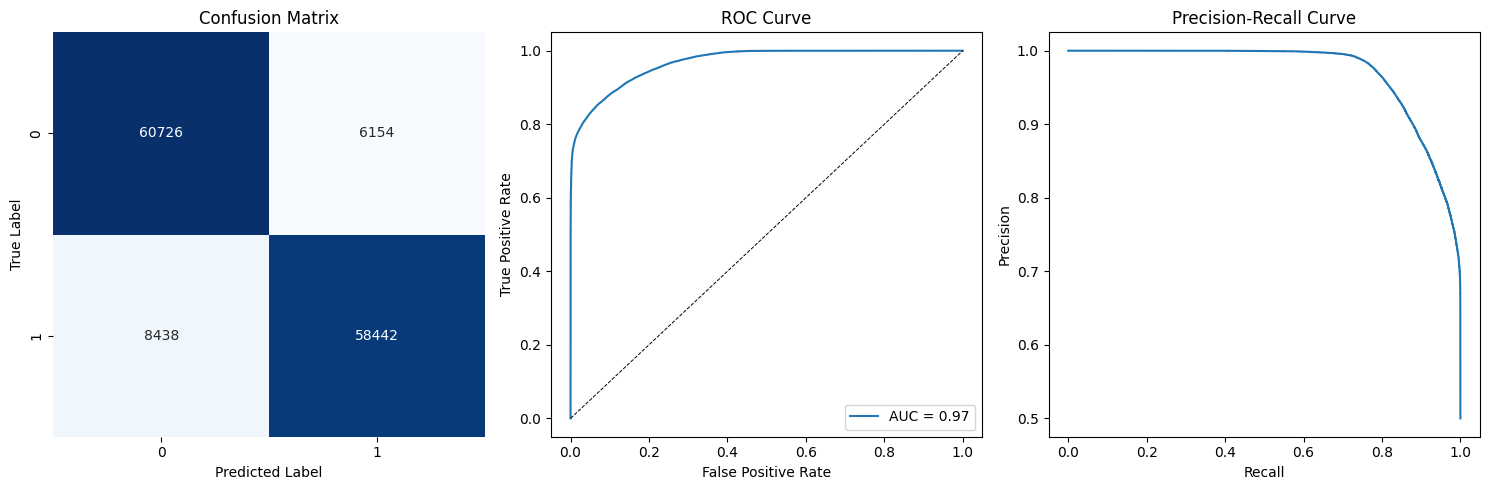

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=0.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.subplot(1, 3, 3)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# parameter distributions
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
}

# Randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train, y_train)

# Print the best hyperparameters and cross-validation score
print("Best Hyperparameters:")
print(random_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(random_search.best_score_))


best_model = random_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Set Score: {:.2f}".format(test_score))

# Save the best model
joblib.dump(best_model, 'best_xgb_model.pkl')
print("Best model saved as 'best_xgb_model.pkl'")



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:03:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters:
{'subsample': 0.7, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.9}
Best Cross-Validation Score: 0.89
Test Set Score: 0.90
Best model saved as 'best_xgb_model.pkl'


##### Which hyperparameter optimization technique have you used and why?

As before, I chose RandomizedSearchCV instead of GridSearchCV because testing all hyperparameter combinations with GridSearchCV is computationally expensive and time-consuming.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Same as before i didn't see any difference in accuracy, even after hyperparameter tuning with XGBoost.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I chose to use the classification report for evaluation because it provides a comprehensive overview of the model's performance, including precision, recall, F1-score, and support for each class

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the results of hyperparameter tuning and evaluation, i decided to move forward with the **XGBoost model**.

Here are the reasons :

1. **Highest Test Set Score**: The XGBoost model achieved a test set score of 0.90, which is the highest among the three models. This indicates that it performs the best on unseen data.

2. **Best Cross-Validation Score**: The XGBoost model also had the highest cross-validation score of 0.89, suggesting that it consistently performs well across different subsets of the data.

3. **Robust Hyperparameter Configuration**: The best hyperparameters for the XGBoost model include a variety of techniques to prevent overfitting and improve performance, such as subsample, regularization parameters (reg_lambda and reg_alpha), and a balanced learning rate.


## ***7.*** ***Future Work (Optional)***

### 1.Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
model = joblib.load('/content/best_xgb_model.pkl')

In [ ]:
input_data = np.array([[1 ,23, 1, 21.0, 1, 1, 0, 22721.0, 152.0, 103]])

prediction = model.predict(input_data)

#prediction result
print("Prediction:", prediction)

Prediction: [0]
